# Matematický software 

## Cv. 5 - Interpolace a aproximace

Prezentace: [POSEL](MS5_soubory/InterpAprox.pdf)

### Cognitive Apprenticeship

V tomto cvičení ...

In [ ]:
!python3 -m pip install numpy

In [ ]:
!python3 -m pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Aproximovaná funkce

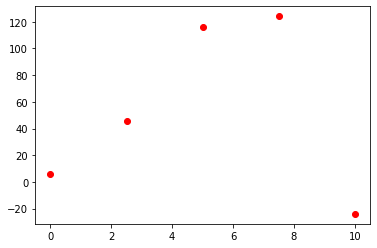

In [6]:
def f(x):
    return -x**3 + 10*x**2 - 3*x + 6

xstart = 0
xend = 10
nx = 5
dx = (xend - xstart)/nx
x = np.linspace(xstart, xend, nx)
fx = f(x)

plt.plot(x, fx, "ro")

#### Lineární interpolace

<img src="MS5_soubory/linear.png" alt="Drawing" style="width: 600px;"/>

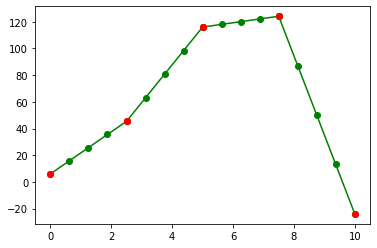

In [11]:
def linear(x, a, b):
    return f(a) + (f(b)-f(a))/(b-a)*(x-a)

phi = []
xphi = []

ninterpol = 5
for i in range(len(x)-1):
    xinterpol = np.linspace(x[i], x[i+1], ninterpol) #body, které mě zajímají uvnitř interpolační funkce
    g = linear(xinterpol, x[i], x[i+1]) #hodnoty bodů interpolační funkce
    xphi.extend(xinterpol)
    phi.extend(g)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

#### Vandermondova matice

<img src="MS5_soubory/vandermontova.png" alt="Drawing" style="width: 350px;"/>

#### Lagrangeova interpolace

<img src="MS5_soubory/lagrange.png" alt="Drawing" style="width: 600px;"/>

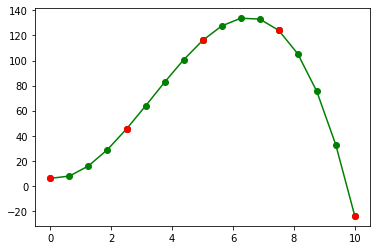

In [16]:
def lagrange(x, xs):
    Ln = 0
    for i in range(len(xs)):
        li = f(x[i])
        for j in range(len(xs)):
            li *= (x-x[j])/(x[i] - x[j]) if i != j else 1
        Ln += li
    return Ln

phi = []
xphi = []

ninterpol = 5
for i in range(len(x)-1):
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)
    g = lagrange(xinterpol, x)
    xphi.extend(xinterpol)
    phi.extend(g)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

cvičení

<img src="MS5_soubory/lagrangeukol.png" alt="Drawing" style="width: 600px;"/>

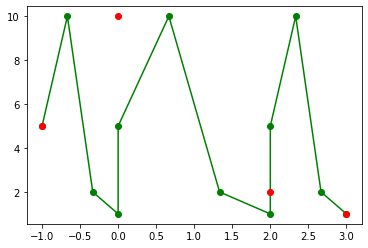

In [25]:
def lagrange(x, xs, fx):
    Ln = 0
    for i in range(len(xs)):
        li = fx[i]
        for j in range(len(xs)):
            li *= (x-x[j])/(x[i] - x[j]) if i != j else 1
        Ln += li
    return Ln

phi = []
xphi = []

x = np.array([-1, 0, 2, 3])
fx = np.array([5, 10, 2, 1])

ninterpol = 4
for i in range(len(x)-1):
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)
    g = lagrange(xinterpol, x, fx)
    xphi.extend(xinterpol)
    phi.extend(g)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

cvičení

<img src="MS5_soubory/lagrangeukol2.png" alt="Drawing" style="width: 600px;"/>

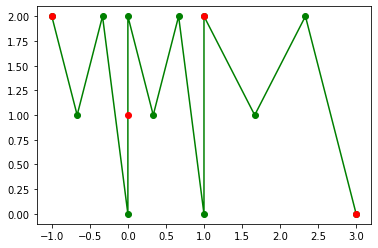

In [26]:
def lagrange(x, xs, fx):
    Ln = 0
    for i in range(len(xs)):
        li = fx[i]
        for j in range(len(xs)):
            li *= (x-x[j])/(x[i] - x[j]) if i != j else 1
        Ln += li
    return Ln

phi = []
xphi = []

x = np.array([-1, 0, 1, 3])
fx = np.array([2, 1, 2, 0])

ninterpol = 4
for i in range(len(x)-1):
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)
    g = lagrange(xinterpol, x, fx)
    xphi.extend(xinterpol)
    phi.extend(g)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

#### Newtonova metoda

<img src="MS5_soubory/newton.png" alt="Drawing" style="width: 600px;"/>

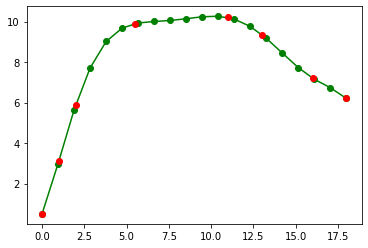

In [35]:
def _poly_newton_coefficient(x, y):
    m = len(x)
    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])
    return a

def newton_polynomial(x_data, y_data, x):
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p
    return p

x = np.array([0, 1, 2, 5.5, 11, 13, 16, 18])
fx =  np.array([0.5, 3.134, 5.9, 9.9, 10.2, 9.35, 7.2, 6.2])

n = 20
xphi = np.linspace(x[0], x[-1], n)
phi = newton_polynomial(x, fx, xphi)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()


<img src="MS5_soubory/newtonspolu.png" alt="Drawing" style="width: 600px;"/>

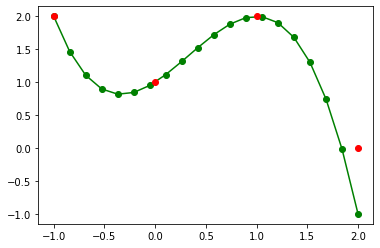

In [32]:
x = np.array([-1, 0, 1, 2])
fx =  np.array([2, 1, 2, 0])

n = 20
xphi = np.linspace(x[0], x[-1], n)
phi = newton_polynomial(x, fx, xphi)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

<img src="MS5_soubory/newtonspolu2.png" alt="Drawing" style="width: 600px;"/>

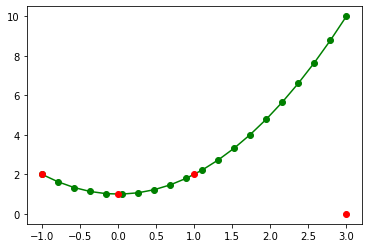

In [33]:
x = np.array([-1, 0, 1, 3])
fx =  np.array([2, 1, 2, 0])

n = 20
xphi = np.linspace(x[0], x[-1], n)
phi = newton_polynomial(x, fx, xphi)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

cvičení

<img src="MS5_soubory/newtonukol1.png" alt="Drawing" style="width: 600px;"/>

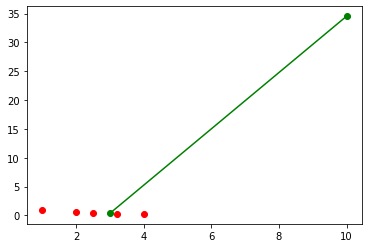

In [36]:
x = np.array([1, 2, 2.5, 3.2, 4])
fx =  np.array(list(map(lambda x: 1/x, x)))

xphi = np.array([3, 10])
phi = newton_polynomial(x, fx, xphi)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

<img src="MS5_soubory/newtonukol2.png" alt="Drawing" style="width: 600px;"/>

In [ ]:
x = np.array([-1, 0, 2, 3])
fx =  np.array([5, 10, 2, 1])

n = 20
xphi = np.linspace(x[0], x[-1], n)
phi_newton = newton_polynomial(x, fx, xphi)
phi_lagrange = newton_polynomial(x, fx, xphi)

plt.plot(xphi, phi_newton, "g-")
plt.plot(xphi, phi_lagrange, "b-")
plt.plot(x, fx, "ro")
plt.show()

#### Trigoniometrický polynom

* <img src="MS5_soubory/trigonio.png" alt="Drawing" style="width: 500px;"/>

* <img src="MS5_soubory/trigonio2.png" alt="Drawing" style="width: 400px;"/>

#### Aproximace metodou nejmenších čtverců

<img src="MS5_soubory/nejmc.png" alt="Drawing" style="width: 500px;"/>

<img src="MS5_soubory/nejmccviko.png" alt="Drawing" style="width: 700px;"/>

<img src="MS5_soubory/nejmcukol.png" alt="Drawing" style="width: 700px;"/>

### Domácí cvičení